In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [2]:
data = pd.read_csv('digit-recognizer/train.csv')


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_,m_train = X_train.shape

In [6]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    out = np.exp(Z) / sum(np.exp(Z))
    return out

def forw_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0
     
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_desc(X, Y, iter, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iter):
        Z1, A1, Z2, A2 = forw_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print('Iteration: ', i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
#training cell
W1, b1, W2, b2 = gradient_desc(X_train, Y_train, 10000, 0.1)

Iteration:  0
[4 7 4 ... 4 2 3] [7 6 8 ... 2 2 3]
0.08614634146341463
Iteration:  10
[4 7 2 ... 3 2 3] [7 6 8 ... 2 2 3]
0.1763170731707317
Iteration:  20
[2 7 2 ... 3 2 3] [7 6 8 ... 2 2 3]
0.27114634146341465
Iteration:  30
[2 9 2 ... 3 2 3] [7 6 8 ... 2 2 3]
0.35592682926829267
Iteration:  40
[2 9 2 ... 3 2 3] [7 6 8 ... 2 2 3]
0.42065853658536584
Iteration:  50
[2 6 7 ... 3 2 3] [7 6 8 ... 2 2 3]
0.4713414634146341
Iteration:  60
[7 6 7 ... 3 2 3] [7 6 8 ... 2 2 3]
0.5157073170731707
Iteration:  70
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.5539024390243903
Iteration:  80
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.5835365853658536
Iteration:  90
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.6089024390243902
Iteration:  100
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.6328536585365854
Iteration:  110
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.6541463414634147
Iteration:  120
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.6729024390243903
Iteration:  130
[7 4 9 ... 3 2 3] [7 6 8 ... 2 2 3]
0.6892926829268292
Iteration:  1

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forw_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  9


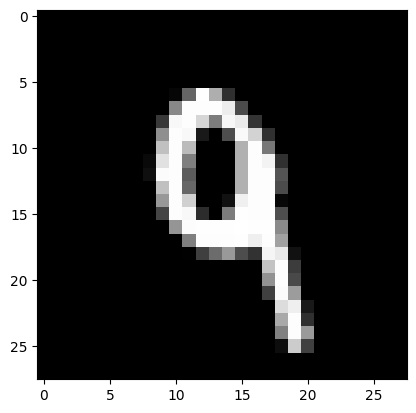

In [27]:
#quick testing cell
test_prediction(11211, W1, b1, W2, b2)

In [14]:
#dev_set testing
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 4 9 2 8 7 9 1 7 5 1 3 0 9 1 6 1 1 6 1 1 4 4 5 6 5 1 9 5 6 9 0 5 0 1 9 5
 1 3 0 4 7 6 7 5 1 7 8 5 0 3 3 2 0 2 8 2 2 4 6 2 6 2 1 5 1 3 5 0 2 3 9 6 3
 2 2 9 2 7 1 9 9 6 4 3 4 2 2 0 2 2 7 0 2 1 8 3 4 3 9 5 7 3 8 5 3 2 3 8 8 3
 1 0 7 5 6 3 4 5 9 8 1 1 2 8 0 2 0 8 7 5 8 6 2 6 6 8 9 1 4 0 3 7 7 7 2 3 2
 1 6 5 9 8 7 5 0 8 6 8 1 6 0 8 0 8 8 8 6 9 4 1 5 4 6 7 2 9 2 0 3 8 8 5 0 3
 8 9 6 7 1 3 3 9 9 3 2 4 2 8 6 2 9 1 2 3 2 6 3 0 0 4 4 6 2 9 4 4 7 9 8 1 9
 6 4 2 9 4 6 9 3 0 7 4 0 0 7 0 8 3 6 1 7 6 8 8 9 9 1 6 8 4 4 3 8 8 0 9 3 6
 6 9 9 7 8 5 0 6 1 5 1 2 2 1 2 5 7 8 8 4 9 4 3 3 9 1 3 7 1 5 2 7 0 1 4 2 4
 3 5 0 7 1 0 4 9 4 5 9 0 6 3 2 8 1 5 3 2 0 1 2 6 0 9 1 7 5 8 7 9 8 7 1 6 1
 4 3 2 5 3 5 8 1 4 1 0 1 1 4 8 7 5 7 1 4 9 8 2 1 1 6 8 7 9 8 0 4 7 0 2 7 2
 8 9 1 0 4 4 0 8 9 9 7 5 6 6 0 8 6 3 9 9 6 7 3 4 1 4 8 1 0 6 0 0 6 6 9 0 8
 2 9 9 0 9 4 9 3 9 6 2 6 6 4 5 8 1 9 0 1 8 7 7 2 9 9 6 1 1 1 0 1 8 6 6 4 3
 1 1 5 2 9 4 4 7 8 2 8 2 5 1 4 9 9 8 9 9 2 3 7 0 7 7 3 5 5 2 7 9 9 6 6 7 9
 6 3 8 9 1 1 1 8 8 5 5 7 

np.float64(0.947)